## Transfer Learning Resnet50 using Keras

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:


resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Pictures/tomato/train'
valid_path = '/content/gdrive/MyDrive/Pictures/tomato/val'


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Pictures/tomato/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [ ]:

r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

<ipython-input-16-1593f5338362>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
313/313 [==============================] - 143s 458ms/step - loss: 1.3661 - accuracy: 0.6309 - val_loss: 2.5305 - val_accuracy: 0.5150
Epoch 2/30
313/313 [==============================] - 144s 458ms/step - loss: 1.3557 - accuracy: 0.6410 - val_loss: 3.2601 - val_accuracy: 0.4570
Epoch 3/30
313/313 [==============================] - 142s 455ms/step - loss: 1.2643 - accuracy: 0.6488 - val_loss: 3.2457 - val_accuracy: 0.4750
Epoch 4/30
313/313 [==============================] - 143s 457ms/step - loss: 1.2339 - accuracy: 0.6586 - val_loss: 2.0298 - val_accuracy: 0.5770
Epoch 5/30
313/313 [==============================] - 142s 453ms/step - loss: 1.2688 - accuracy: 0.6562 - val_loss: 2.0978 - val_accuracy: 0.5580
Epoch 6/30
313/313 [==============================] - 142s 455ms/step - loss: 1.3393 - accuracy: 0.6420 - val_loss: 3.0581 - val_accuracy: 0.4720
Epoch 7/30
313/313 [==============================] - 142s 453ms/step - loss: 1.3159 - accuracy: 0.6538 - val_loss: 2.0429 -

In [ ]:
scores=model.evaluate(valid_set)
scores

32/32 [==============================] - 4s 120ms/step - loss: 1.9469 - accuracy: 0.6280


[1.9469190835952759, 0.628000020980835]

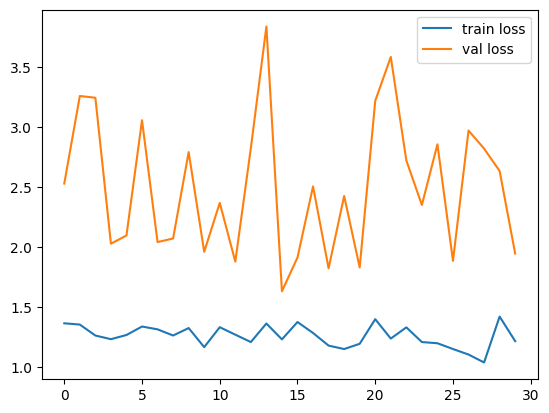

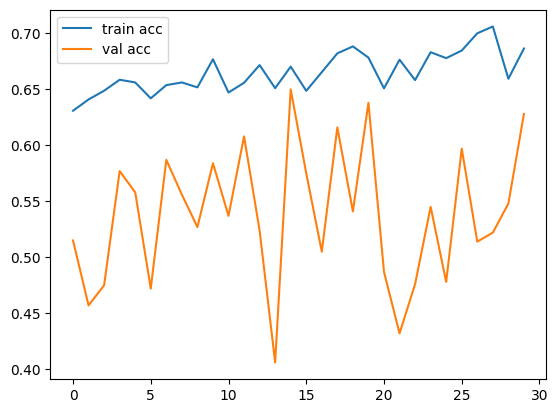

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(valid_set)


32/32 [==============================] - 6s 161ms/step


In [ ]:
y_pred

array([[2.03714101e-03, 6.67297980e-04, 8.35756418e-06, ...,
        9.96881723e-01, 9.51721013e-05, 6.56495084e-12],
       [9.76938903e-01, 2.12456118e-02, 9.70837194e-04, ...,
        1.72800464e-05, 5.77362647e-09, 2.68873413e-11],
       [4.16735136e-12, 1.44325822e-05, 1.45393666e-02, ...,
        6.14706686e-09, 2.80068548e-07, 3.40580102e-03],
       ...,
       [1.03002047e-12, 5.77948568e-03, 4.74906119e-04, ...,
        1.04303644e-13, 6.69613345e-13, 3.09972726e-02],
       [5.03819104e-11, 1.50229471e-05, 5.05497446e-05, ...,
        1.47811887e-08, 3.32957590e-08, 3.27298397e-11],
       [4.41126285e-05, 9.98298347e-05, 3.29529005e-03, ...,
        2.91581509e-10, 1.79240476e-06, 1.50175439e-03]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([7, 0, 3, 7, 1, 2, 0, 9, 5, 9, 8, 2, 4, 9, 0, 9, 8, 3, 8, 9, 0, 3,
       5, 2, 3, 2, 3, 9, 2, 2, 2, 9, 8, 9, 7, 3, 5, 2, 2, 8, 8, 9, 4, 0,
       2, 4, 9, 9, 0, 9, 4, 8, 9, 5, 1, 8, 2, 3, 7, 0, 0, 7, 6, 0, 3, 8,
       7, 0, 2, 1, 0, 7, 9, 8, 9, 8, 8, 5, 1, 3, 2, 3, 9, 3, 9, 0, 9, 5,
       8, 8, 1, 0, 4, 0, 0, 9, 9, 9, 2, 2, 5, 9, 7, 0, 4, 0, 5, 2, 8, 9,
       8, 9, 9, 2, 8, 1, 4, 3, 9, 4, 1, 9, 9, 9, 4, 7, 8, 2, 7, 2, 6, 5,
       0, 2, 5, 2, 8, 2, 3, 8, 9, 3, 7, 5, 9, 0, 3, 0, 2, 0, 2, 0, 5, 5,
       9, 3, 2, 9, 2, 2, 1, 7, 8, 9, 9, 8, 3, 5, 9, 9, 8, 8, 3, 9, 8, 4,
       1, 8, 2, 2, 3, 8, 7, 9, 9, 9, 3, 2, 0, 9, 0, 1, 2, 9, 7, 2, 9, 4,
       2, 9, 7, 1, 9, 0, 3, 9, 8, 9, 9, 9, 2, 8, 2, 3, 7, 1, 9, 3, 9, 0,
       2, 2, 6, 0, 0, 9, 1, 7, 0, 6, 5, 9, 2, 0, 0, 8, 8, 8, 3, 2, 9, 5,
       0, 9, 1, 9, 9, 0, 8, 8, 7, 9, 9, 4, 2, 9, 9, 1, 0, 1, 8, 5, 4, 9,
       4, 9, 9, 9, 3, 3, 7, 9, 2, 9, 1, 9, 2, 0, 3, 7, 9, 2, 9, 4, 9, 8,
       3, 6, 4, 9, 1, 3, 1, 8, 2, 2, 0, 7, 6, 1, 1,

In [ ]:
class_names=list(training_set.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

1/1 [==============================] - 0s 22ms/step


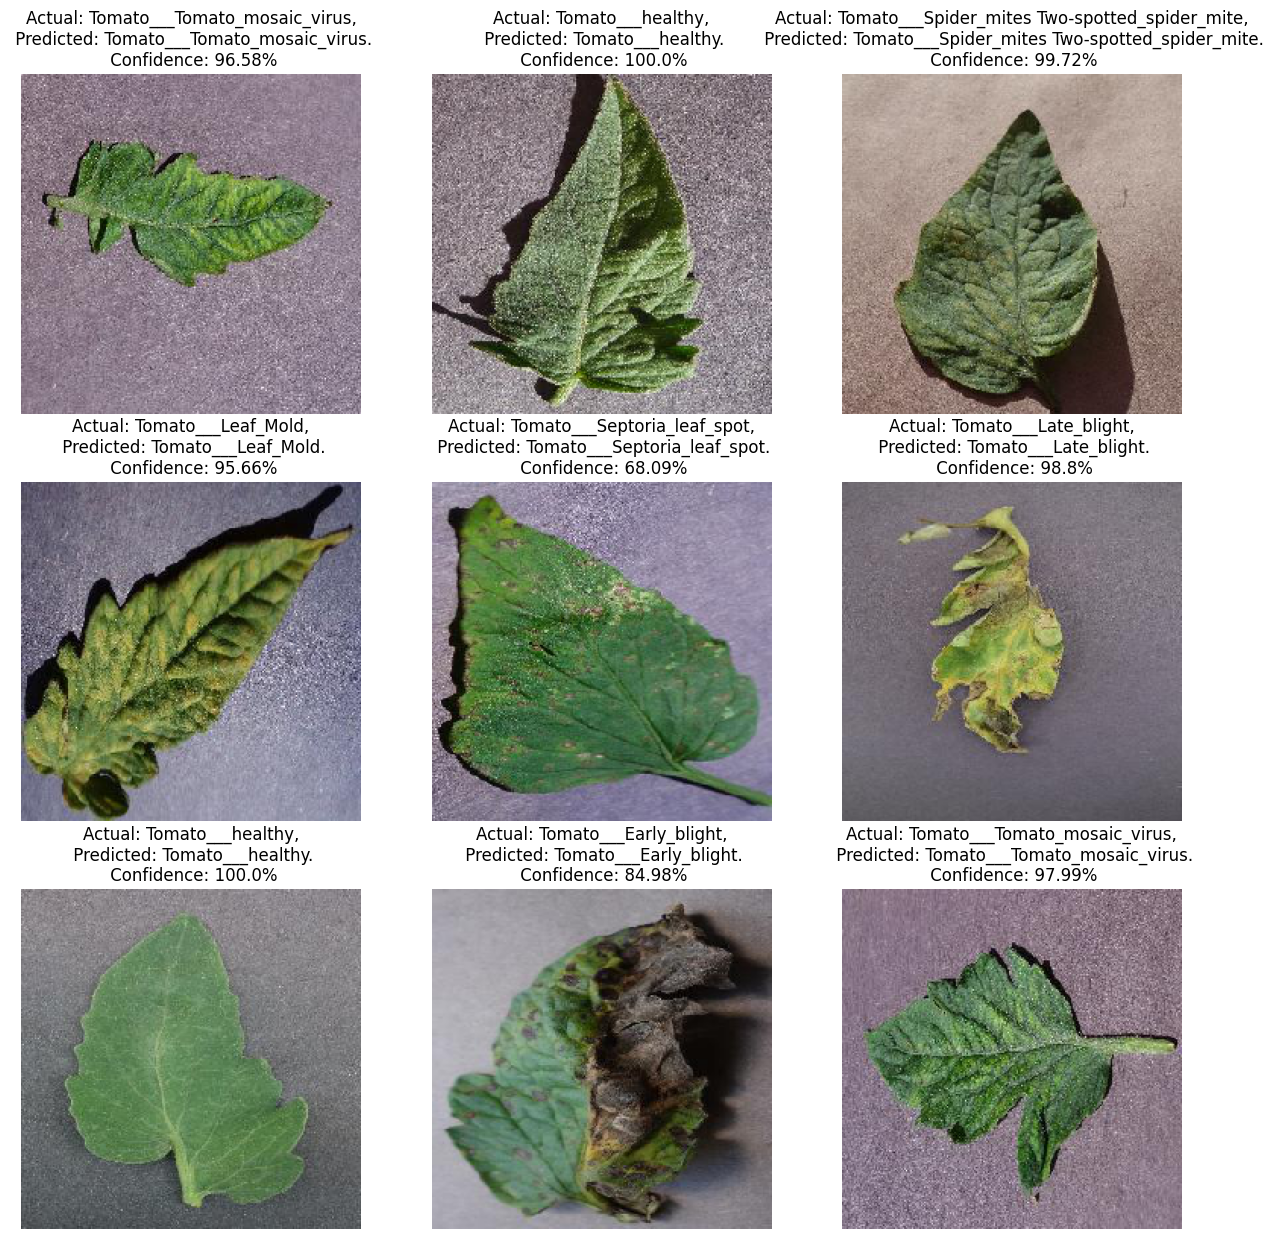

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in valid_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break